In [98]:
# Import Yahoo Finance API
import yfinance as yf

# Import backtesting utils
import backtest_tools.portfolio_tools as backtest
import statsmodels.api as sm

# Import utils
import numpy as np
import pandas as pd
from pandas.tseries.offsets import BDay
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

Load Returns

In [95]:
tickers = pd.read_csv(r'C:\Users\marcu\Documents\University of Miami\Clubs\TAMID\Quant Group\russell_3000_ticker_list.csv').values
tickers = tickers.reshape(tickers.shape[0])

returns = pd.DataFrame()

i = 0
l = len(tickers)

for ticker in tickers:

    i += 1

    try:
        # Print progress
        print(f'Loading {i} out of {l}')

        # Get trailing month's worth of stock prices
        prices = yf.download(ticker, start=dt.date.today()-BDay(252*15), end=dt.date.today())['Adj Close']

        # Get raw asset returns
        tmp_returns = prices.pct_change()
        tmp_returns = tmp_returns.rename(ticker)
        returns = pd.concat([returns, tmp_returns], axis=1)
    
    except:
        print(f'ERROR: {ticker}')

Loading 1 out of 2612
[*********************100%***********************]  1 of 1 completed
Loading 2 out of 2612
[*********************100%***********************]  1 of 1 completed
Loading 3 out of 2612
[*********************100%***********************]  1 of 1 completed
Loading 4 out of 2612
[*********************100%***********************]  1 of 1 completed
Loading 5 out of 2612
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRKB: No data found, symbol may be delisted
Loading 6 out of 2612
[*********************100%***********************]  1 of 1 completed
Loading 7 out of 2612
[*********************100%***********************]  1 of 1 completed
Loading 8 out of 2612
[*********************100%***********************]  1 of 1 completed
Loading 9 out of 2612
[*********************100%***********************]  1 of 1 completed
Loading 10 out of 2612
[*********************100%***********************]  1 of 1 completed
Loading 11 out of 2612


In [99]:
new_returns = returns.drop(columns=[col for col in returns.columns if len(returns[col].dropna()) < 252*3])
new_returns

,AAPL,MSFT,AMZN,GOOGL,GOOG,NVDA,XOM,TSLA,UNH,JNJ,...,TUP,RLMD,DHC,INSG,VXRT,EGIO,TTCF,YMAB,EIGR,GOSS
2008-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-12,0.018265,0.007886,-0.009536,0.003534,0.003534,-0.014248,-0.016377,NaN,0.007360,0.000558,...,-0.002922,NaN,-0.007236,-0.013994,-0.014337,0.004598,NaN,NaN,NaN,NaN
2008-08-13,0.014542,-0.007468,-0.006418,-0.005133,-0.005133,0.107498,0.016779,NaN,0.004129,-0.006973,...,-0.007461,NaN,0.013212,-0.001092,-0.001818,-0.091533,NaN,NaN,NaN,NaN
2008-08-14,0.000112,0.000000,0.015457,0.010919,0.010919,0.060359,-0.009211,NaN,0.008858,-0.000140,...,-0.001879,NaN,0.021582,0.009836,0.021858,-0.010076,NaN,NaN,NaN,NaN
2008-08-15,-0.019964,-0.003583,-0.018516,0.009219,0.009219,-0.003077,-0.004906,NaN,0.035121,0.001966,...,0.033351,NaN,-0.010123,-0.009740,-0.014260,0.071247,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-30,-0.020078,-0.021962,-0.016530,-0.024454,-0.027405,-0.059072,-0.017732,-0.063182,-0.000535,-0.037033,...,0.002427,-0.014563,0.039474,-0.042735,-0.036036,-0.019108,-0.006329,0.000000,0.161972,-0.020576
2023-01-31,0.009021,0.021013,0.025659,0.019600,0.019602,0.019570,0.021575,0.039362,0.027584,0.008765,...,0.072639,0.000000,0.000000,0.035714,0.009346,0.019481,-0.031847,0.011261,0.151515,0.109244
2023-02-01,0.007901,0.019935,0.019587,0.016087,0.015620,0.071966,-0.010947,0.047281,-0.004387,0.009179,...,0.002257,0.059113,-0.075949,0.017241,0.009259,0.000000,0.059211,0.033408,0.042105,0.071970
2023-02-02,0.037063,0.046884,0.073799,0.072787,0.072661,0.036575,-0.031288,0.037815,-0.052656,0.003759,...,0.033784,-0.006977,0.000000,0.059322,0.009174,0.114650,0.068323,0.038793,0.085859,0.031802


In [97]:
import pickle

dump_path = r'C:\Users\marcu\Documents\Quant\Programming\Data\russell_300_returns.pickle'

with open(dump_path, 'wb') as handler:
    pickle.dump(new_returns, handler, protocol=pickle.HIGHEST_PROTOCOL)

In [137]:
new_returns = new_returns.loc['2020':].dropna()

In [144]:
def drift_adjusted_sharpe_ratio(returns: pd.Series, normalize_residuals='Normalization', plot=False):

    if normalize_residuals=='STD':
        returns = returns.dropna()
        cum_rets = backtest.cumulative_returns(returns)
        cum_rets = (cum_rets - cum_rets.min()) / (cum_rets.max() - cum_rets.min())
    else:
        # Scale reutrns to 10% vol
        returns = backtest.scale_vol(returns.dropna())
        cum_rets = backtest.cumulative_returns(returns)
    
    # # Construct OLS regression of portfolio returns over time
    # cum_rets = backtest.cumulative_returns(returns, log_rets=False)
    # # Normalize Cumulative Returns s.t. Cumulative Returns end at 1
    # cum_rets = (cum_rets - cum_rets.min()) / (cum_rets.max() - cum_rets.min())
    
    # Get numerical values of time as exog variable
    date_index = np.arange(cum_rets.index.size)
    exog = sm.add_constant(date_index)  

    # Build model
    model = sm.OLS(cum_rets, exog)
    portfolio_regression = model.fit()

    # Get regression params
    alpha = portfolio_regression.params[0]
    beta = portfolio_regression.params[1]

    # Compute best fit line and format
    reg_pred = date_index * beta + alpha
    reg_pred = pd.Series(reg_pred, index=returns.index, name='Predicted Returns')

    # ----------------------------------- Plot Returns + Best Fit Line -----------------------------------
    if plot:
        plt.figure(figsize=(20, 10))
        cum_rets.plot()
        reg_pred.plot()
        plt.legend()
        plt.show()

    # Build Regression DataFrame
    regression_df = pd.concat([cum_rets, reg_pred], axis=1)

    # Get squared residuls and normalized squared residuals
    regression_df['Squared Error'] = np.square(regression_df.iloc[:,0] - regression_df.iloc[:,1])   
    regression_df['Cubed Error'] = (regression_df.iloc[:,0] - regression_df.iloc[:,1])**3
    regression_df['Min Max Normalized Squared Error'] = (regression_df['Squared Error'] - regression_df['Squared Error'].min()) / (regression_df['Squared Error'].max() - regression_df['Squared Error'].min())  

    # Get MSE and normalized MSE
    mse = regression_df['Squared Error'].mean()
    normalized_mse = regression_df['Min Max Normalized Squared Error'].mean()
    std_squared_error = regression_df['Squared Error'].std()
    std_cubed_error = regression_df['Cubed Error'].std()
    
    # Get Drift Adjusted Sharpe Ratio
    drift_adjusted_sharpe_ratio = (beta / mse) * 10 # Use this. Captures behaviour better. No need to norm residuals.
    normed_drift_adjusted_sharpe_ratio = (beta / normalized_mse) * 100
    std_drift_adjusted_sharpe_ratio = (beta / std_squared_error)

    if plot:
        print(f'MSE: {mse}')
        print(f'Normalized MSE: {normalized_mse}')
        print(f'Beta: {beta}')
        print('='*50)
        print(f'DASR: {drift_adjusted_sharpe_ratio}')
        print(f'Normalized DASR: {normed_drift_adjusted_sharpe_ratio}')

    sharpe_ratio = backtest.sharpe_ratio(returns)
    # print(f'Sharpe Ratio: {sharpe_ratio}')

    # If DASR is calculated by normalizing residuals for MSE
    if normalize_residuals == 'Normalized':
        return pd.Series({'DASR' : normed_drift_adjusted_sharpe_ratio, 'SR' : sharpe_ratio}, name=returns.name)
    
    elif normalize_residuals == 'STD':
        return pd.Series({'DASR' : std_drift_adjusted_sharpe_ratio, 'SR' : sharpe_ratio}, name=returns.name)
    
    elif normalize_residuals == 'Non-Normalized':
        return pd.Series({'DASR' : drift_adjusted_sharpe_ratio, 'SR' : sharpe_ratio}, name=returns.name)
    

Compute DASR (non-normalized residuals) and plot the top 20 DASR stocks' cumulative returns

In [141]:
drift_adjusted_sharpe_ratios_non_normalized = {}

for ticker in new_returns.columns:
    drift_adjusted_sharpe_ratios_non_normalized[ticker] = drift_adjusted_sharpe_ratio(returns = new_returns[ticker], normalize_residuals='Non-Normalized')

drift_adjusted_sharpe_ratios_non_normalized = pd.DataFrame(drift_adjusted_sharpe_ratios_non_normalized)
drift_adjusted_sharpe_ratios_non_normalized

,AAPL,MSFT,AMZN,GOOGL,GOOG,NVDA,XOM,TSLA,UNH,JNJ,...,TUP,RLMD,DHC,INSG,VXRT,EGIO,TTCF,YMAB,EIGR,GOSS
DASR,2.830818,1.291385,-1.373195,0.644411,0.657935,1.040983,7.404935,0.910199,6.342366,4.638473,...,-0.579523,-0.827118,-0.632380,-1.931893,0.374108,0.705936,-0.520263,-0.746260,0.689459,1.21953
SR,0.995308,0.662040,-0.062617,0.786788,0.784207,1.074036,1.837862,1.380132,1.360563,1.005742,...,0.407993,-0.234834,-0.111335,-0.425722,0.536290,0.424196,-0.516096,0.031027,0.265486,0.26852


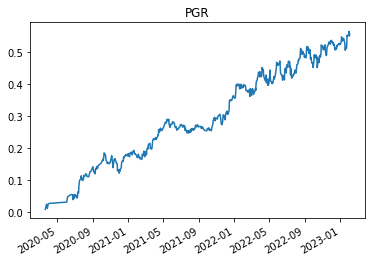

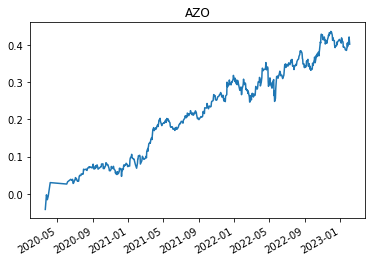

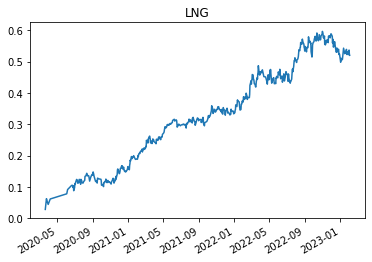

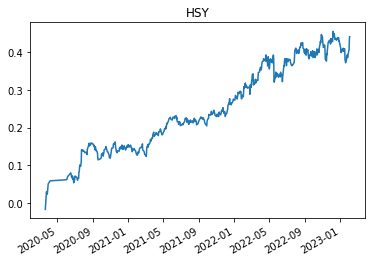

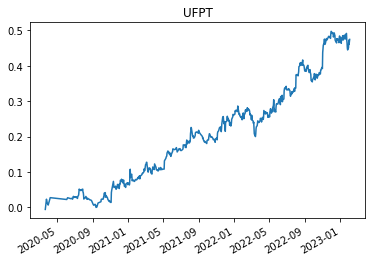

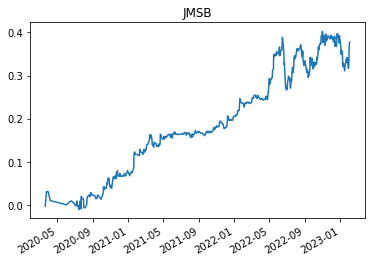

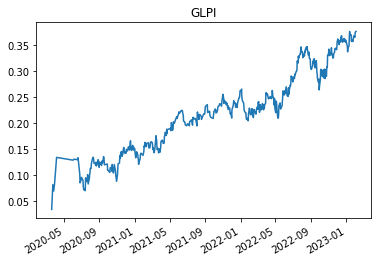

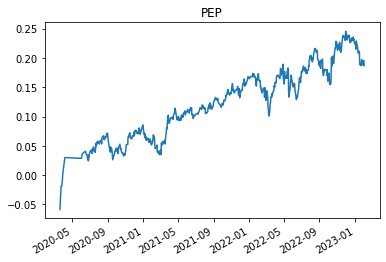

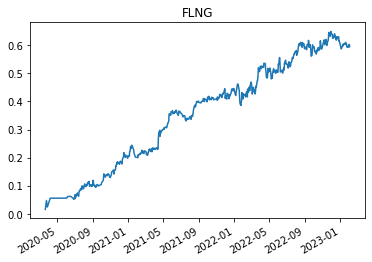

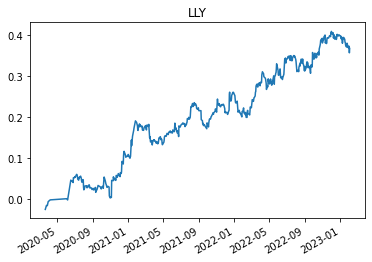

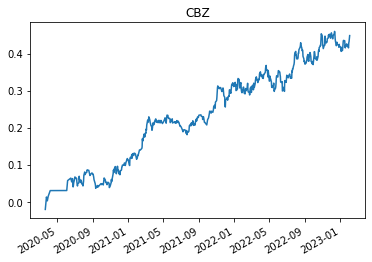

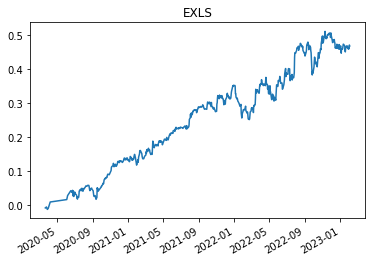

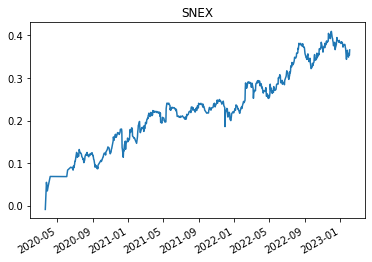

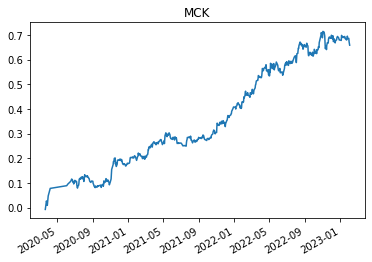

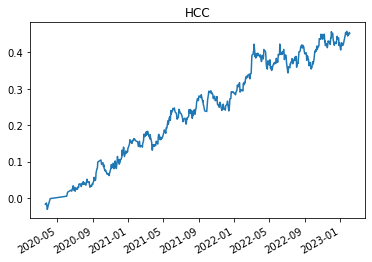

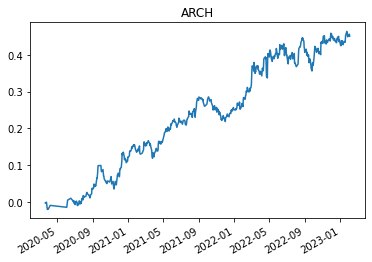

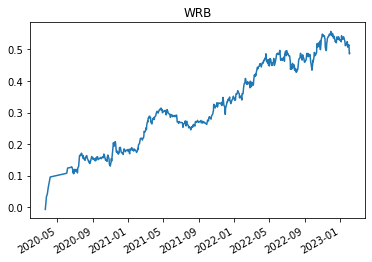

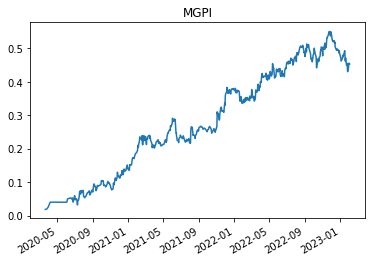

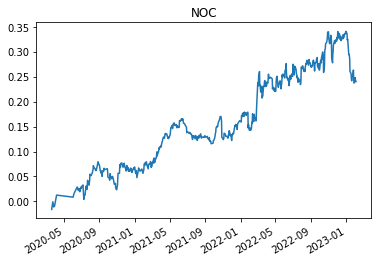

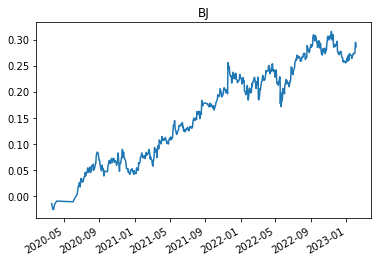

2.852241131964768


,PGR,AZO,LNG,HSY,UFPT,JMSB,GLPI,PEP,FLNG,LLY,CBZ,EXLS,SNEX,MCK,HCC,ARCH,WRB,MGPI,NOC,BJ
DASR,14.291190,11.559639,10.888447,10.804247,10.709237,10.398498,10.014386,9.998943,9.748932,9.634422,9.462855,9.444889,9.249748,9.070861,9.040304,9.012939,8.889375,8.772723,8.707396,8.522654
SR,1.900916,1.461842,1.801709,1.576758,1.673771,1.388040,1.387356,0.766022,2.000206,1.357820,1.598882,1.656357,1.353535,2.164056,1.607307,1.605126,1.710918,1.611642,0.951012,1.101654


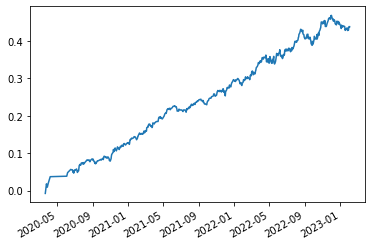

In [142]:
n_largest_dasr = drift_adjusted_sharpe_ratios_non_normalized.loc['DASR'].nlargest(20).index

agg_n_largest_rets = {}
for ticker in n_largest_dasr:
    agg_n_largest_rets[ticker] = backtest.scale_vol(new_returns[ticker]) 
    backtest.cumulative_returns(agg_n_largest_rets[ticker]).plot(title=ticker)
    agg_n_largest_rets[ticker] *=1/len(n_largest_dasr)
    plt.show()
    
agg_n_largest_rets = pd.DataFrame(agg_n_largest_rets).sum(1)
backtest.cumulative_returns(agg_n_largest_rets).plot()
print(backtest.sharpe_ratio(agg_n_largest_rets))

drift_adjusted_sharpe_ratios_non_normalized[drift_adjusted_sharpe_ratios_non_normalized.loc['DASR'].nlargest(20).index]

Compute DASR (normalized residuals) and plot the top 20 DASR stocks' cumulative returns

In [145]:
drift_adjusted_sharpe_ratios_normalized = {}

for ticker in new_returns.columns:
    drift_adjusted_sharpe_ratios_normalized[ticker] = drift_adjusted_sharpe_ratio(returns = new_returns[ticker], normalize_residuals='Normalized')

drift_adjusted_sharpe_ratios_normalized = pd.DataFrame(drift_adjusted_sharpe_ratios_normalized)
drift_adjusted_sharpe_ratios_normalized

,AAPL,MSFT,AMZN,GOOGL,GOOG,NVDA,XOM,TSLA,UNH,JNJ,...,TUP,RLMD,DHC,INSG,VXRT,EGIO,TTCF,YMAB,EIGR,GOSS
DASR,0.322415,0.096819,-0.063684,0.086467,0.090767,0.161643,0.676462,0.331622,0.815812,0.902739,...,-0.225708,-0.099489,-0.162222,-0.224308,0.095815,0.142229,-0.145850,-0.067754,0.099542,0.147458
SR,0.995308,0.662040,-0.062617,0.786788,0.784207,1.074036,1.837862,1.380132,1.360563,1.005742,...,0.407993,-0.234834,-0.111335,-0.425722,0.536290,0.424196,-0.516096,0.031027,0.265486,0.268520


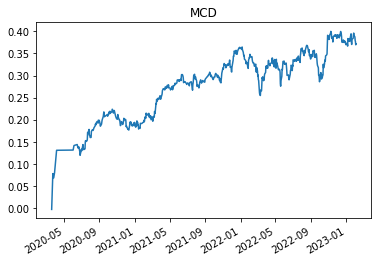

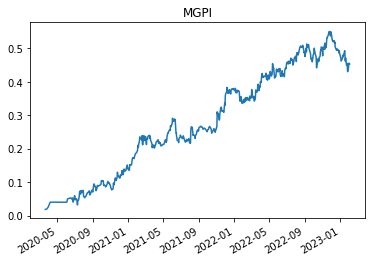

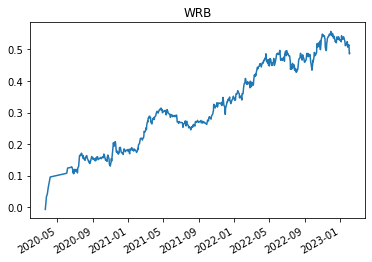

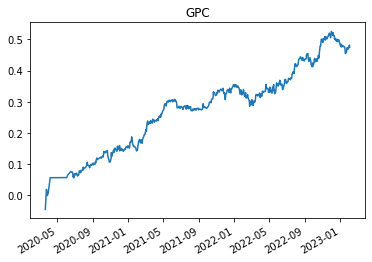

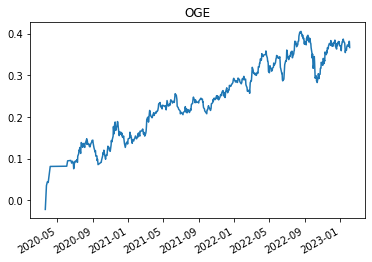

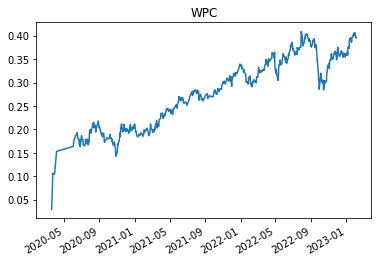

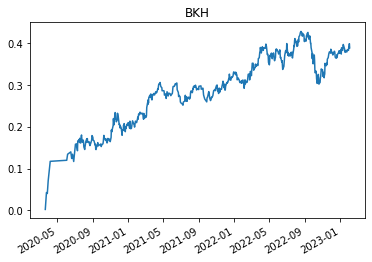

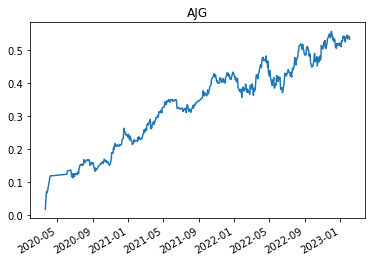

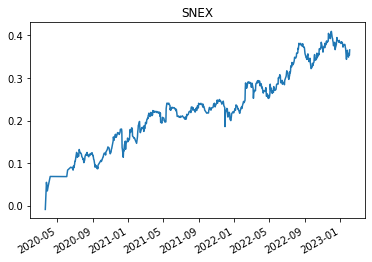

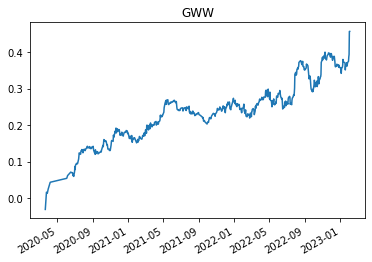

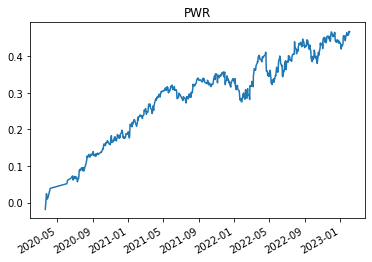

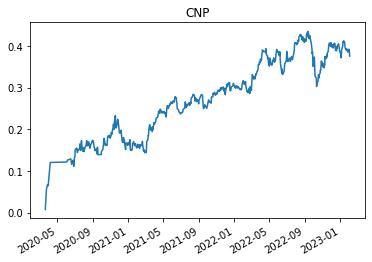

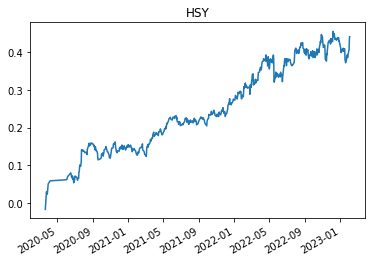

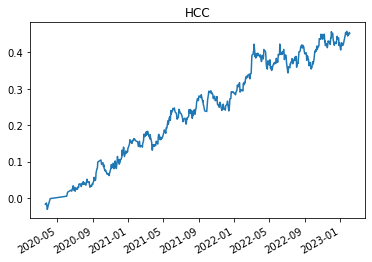

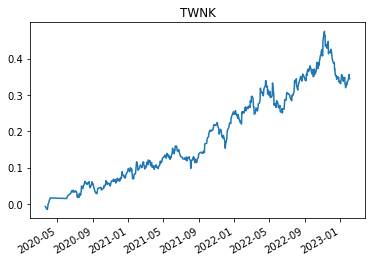

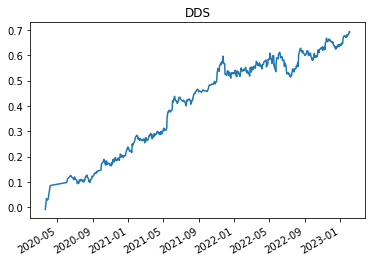

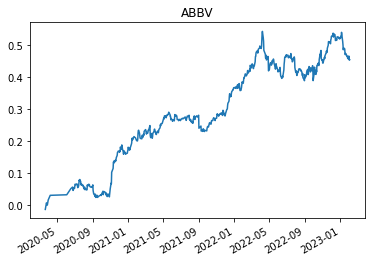

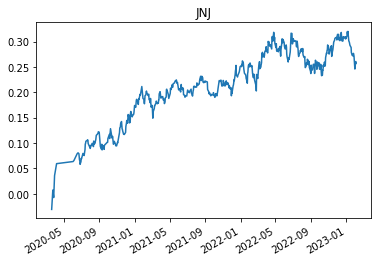

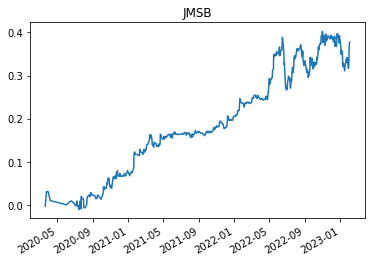

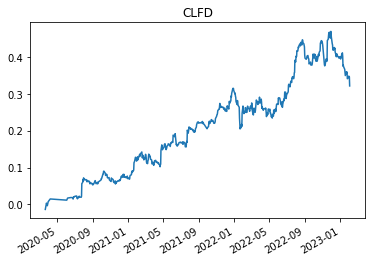

2.4869321465924115


,MCD,MGPI,WRB,GPC,OGE,WPC,BKH,AJG,SNEX,GWW,PWR,CNP,HSY,HCC,TWNK,DDS,ABBV,JNJ,JMSB,CLFD
DASR,1.298614,1.295787,1.269384,1.221011,1.213959,1.133956,1.129511,1.117949,1.094093,1.062533,1.024445,0.974312,0.958341,0.957335,0.932864,0.928973,0.902808,0.902739,0.88707,0.875988
SR,1.371176,1.611642,1.710918,1.674853,1.355376,1.441475,1.422542,1.837535,1.353535,1.623638,1.651694,1.384579,1.576758,1.607307,1.289686,2.246672,1.615060,1.005742,1.38804,1.215502


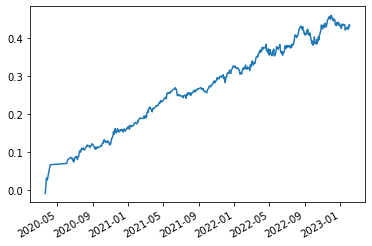

In [146]:
n_largest_dasr = drift_adjusted_sharpe_ratios_normalized.loc['DASR'].nlargest(20).index

agg_n_largest_rets = {}
for ticker in n_largest_dasr:
    agg_n_largest_rets[ticker] = backtest.scale_vol(new_returns[ticker]) 
    backtest.cumulative_returns(agg_n_largest_rets[ticker]).plot(title=ticker)
    agg_n_largest_rets[ticker] *=1/len(n_largest_dasr)
    plt.show()
    
agg_n_largest_rets = pd.DataFrame(agg_n_largest_rets).sum(1)
backtest.cumulative_returns(agg_n_largest_rets).plot()
print(backtest.sharpe_ratio(agg_n_largest_rets))

drift_adjusted_sharpe_ratios_normalized[drift_adjusted_sharpe_ratios_normalized.loc['DASR'].nlargest(20).index]

Compute DASR (STD of residuals) and plot the top 20 DASR stocks' cumulative returns

In [147]:
drift_adjusted_sharpe_ratios_std = {}

for ticker in new_returns.columns:
    drift_adjusted_sharpe_ratios_std[ticker] = drift_adjusted_sharpe_ratio(returns = new_returns[ticker], normalize_residuals='STD')

drift_adjusted_sharpe_ratios_std = pd.DataFrame(drift_adjusted_sharpe_ratios_std)
drift_adjusted_sharpe_ratios_std

,AAPL,MSFT,AMZN,GOOGL,GOOG,NVDA,XOM,TSLA,UNH,JNJ,...,TUP,RLMD,DHC,INSG,VXRT,EGIO,TTCF,YMAB,EIGR,GOSS
DASR,0.041426,0.014547,-0.033191,0.012981,0.013263,0.009683,0.336231,0.016015,0.159534,0.097344,...,-0.013306,-0.015623,-0.024612,-0.037096,-0.014354,0.004364,-0.019784,-0.045039,-0.000414,0.003408
SR,0.995308,0.662040,-0.062617,0.786788,0.784207,1.074036,1.837862,1.380132,1.360563,1.005742,...,0.407993,-0.234834,-0.111335,-0.425722,0.536290,0.424196,-0.516096,0.031027,0.265486,0.268520


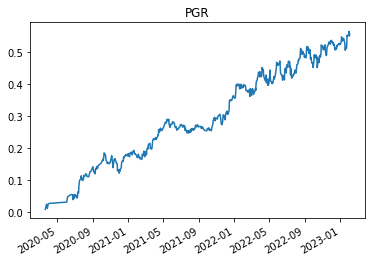

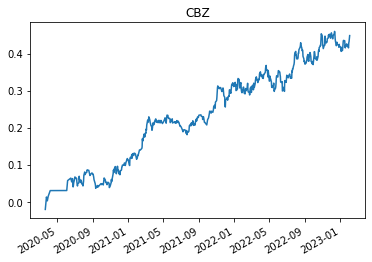

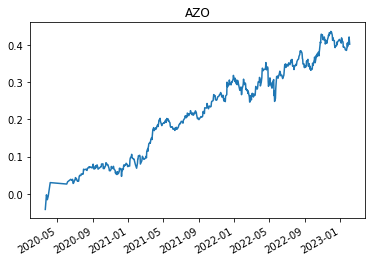

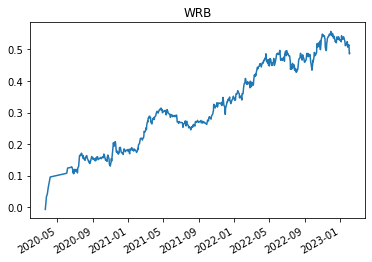

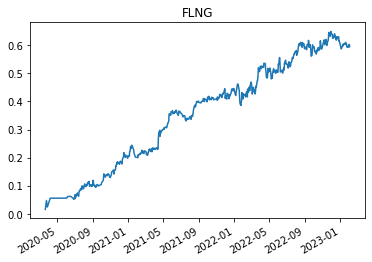

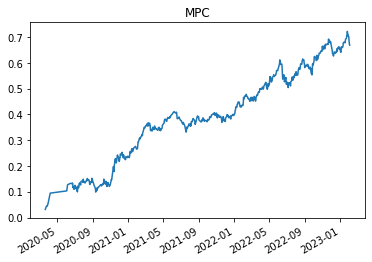

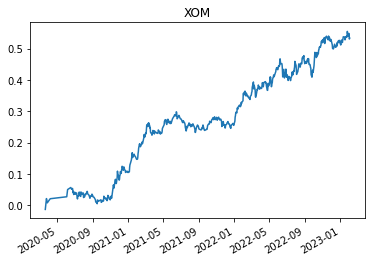

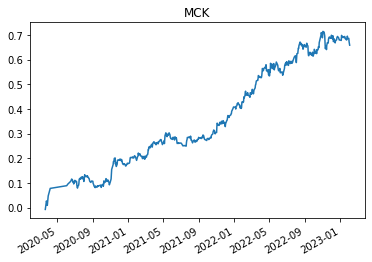

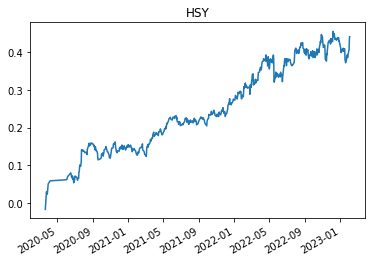

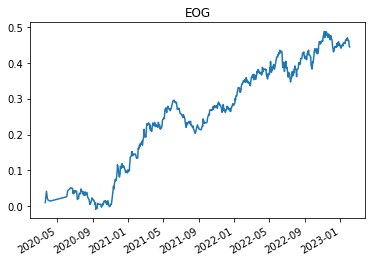

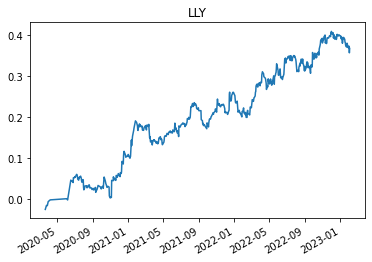

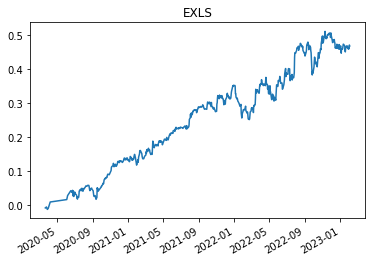

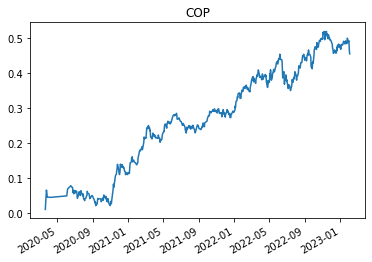

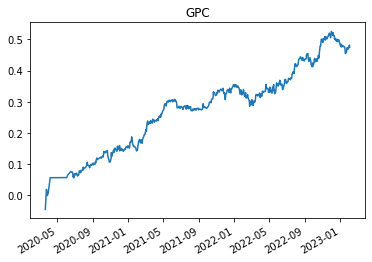

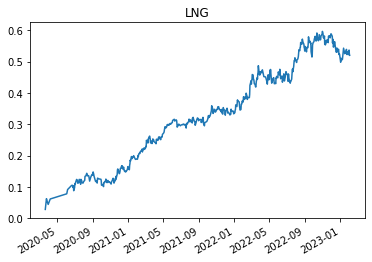

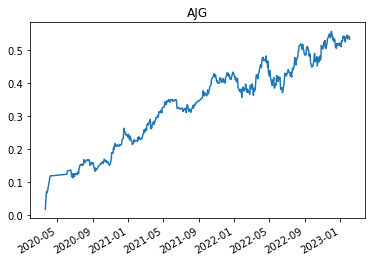

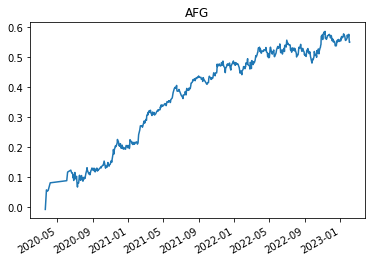

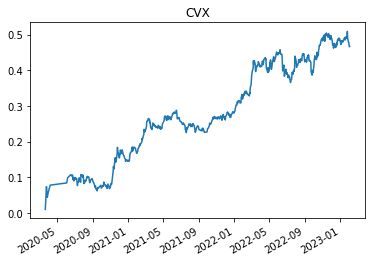

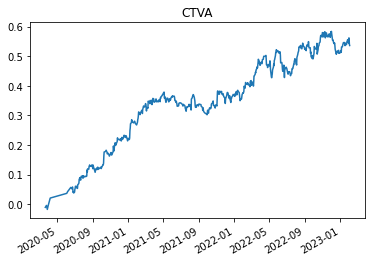

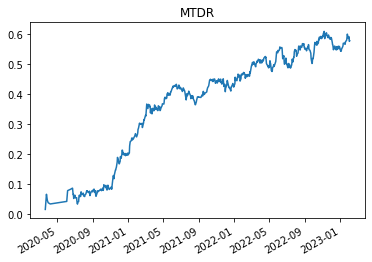

2.7026224583582805


,PGR,CBZ,AZO,WRB,FLNG,MPC,XOM,MCK,HSY,EOG,LLY,EXLS,COP,GPC,LNG,AJG,AFG,CVX,CTVA,MTDR
DASR,0.620634,0.422317,0.388840,0.378278,0.367947,0.337659,0.336231,0.324718,0.316505,0.299235,0.286484,0.276275,0.275293,0.264998,0.260214,0.256898,0.253932,0.253529,0.252772,0.245889
SR,1.900916,1.598882,1.461842,1.710918,2.000206,2.189564,1.837862,2.164056,1.576758,1.586680,1.357820,1.656357,1.618917,1.674853,1.801709,1.837535,1.882914,1.652050,1.844772,1.960850


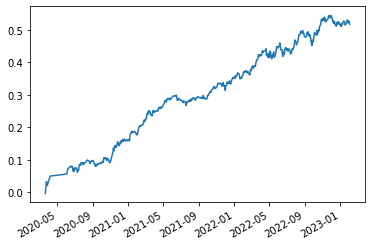

In [148]:
n_largest_dasr = drift_adjusted_sharpe_ratios_std.loc['DASR'].nlargest(20).index

agg_n_largest_rets = {}
for ticker in n_largest_dasr:
    agg_n_largest_rets[ticker] = backtest.scale_vol(new_returns[ticker]) 
    backtest.cumulative_returns(agg_n_largest_rets[ticker]).plot(title=ticker)
    agg_n_largest_rets[ticker] *=1/len(n_largest_dasr)
    plt.show()
    
agg_n_largest_rets = pd.DataFrame(agg_n_largest_rets).sum(1)
backtest.cumulative_returns(agg_n_largest_rets).plot()
print(backtest.sharpe_ratio(agg_n_largest_rets))

drift_adjusted_sharpe_ratios_std[drift_adjusted_sharpe_ratios_std.loc['DASR'].nlargest(20).index]

Compute top 20 SRs and plot the top 20 SR stocks' cumulative returns

Index([], dtype='object')


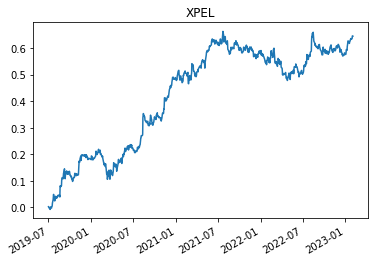

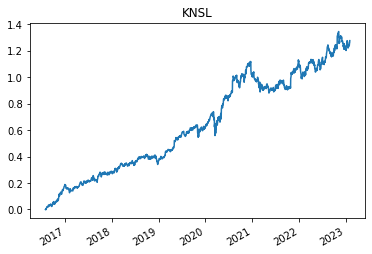

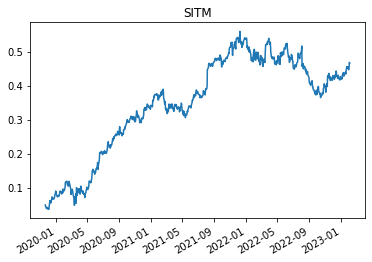

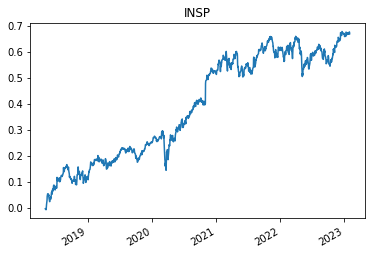

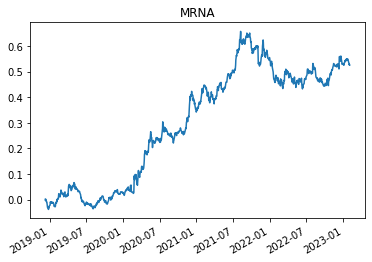

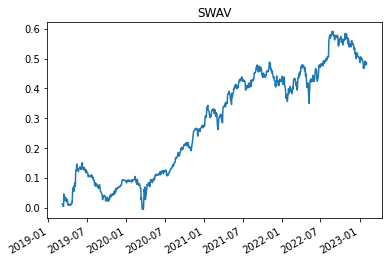

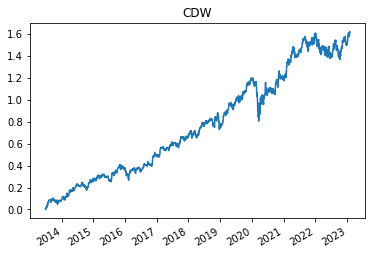

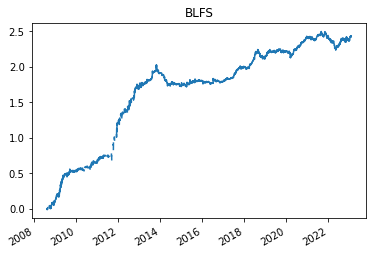

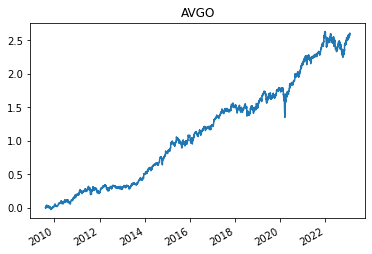

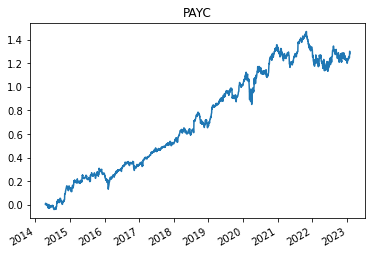

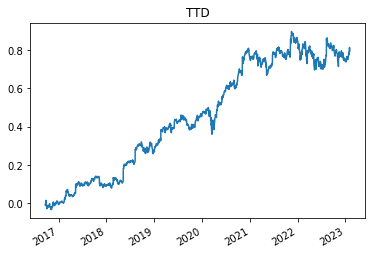

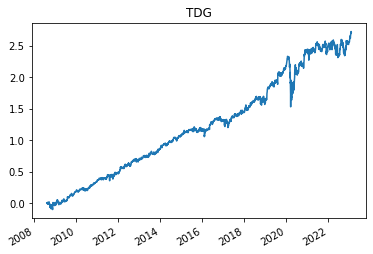

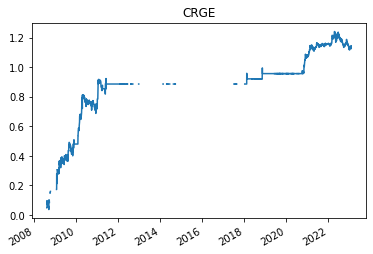

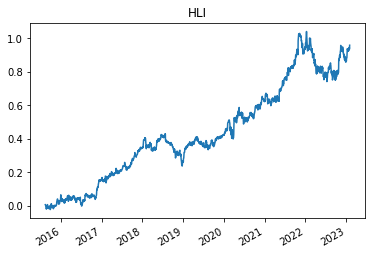

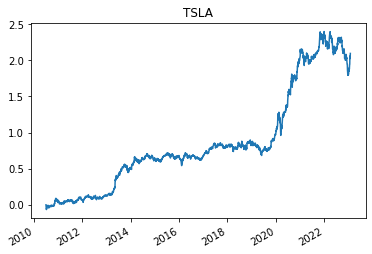

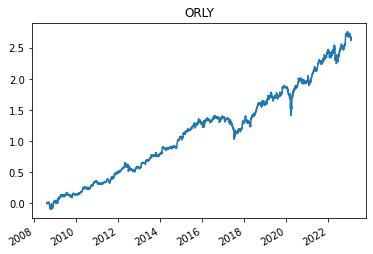

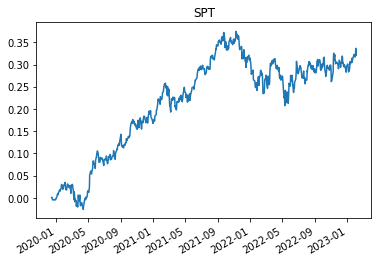

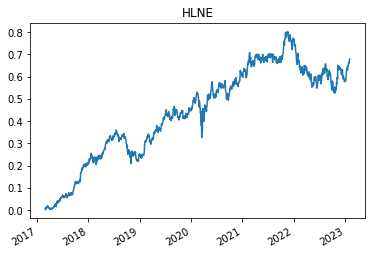

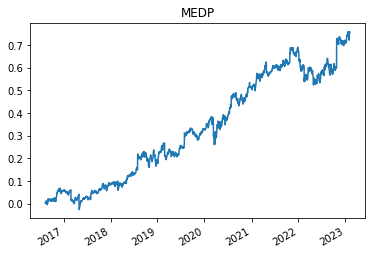

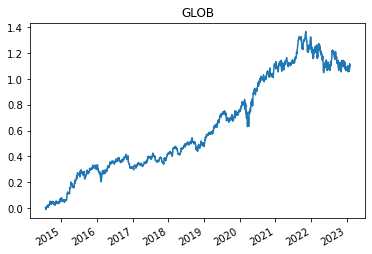

1.5030916176573685


,XPEL,KNSL,SITM,INSP,MRNA,SWAV,CDW,BLFS,AVGO,PAYC,TTD,TDG,CRGE,HLI,TSLA,ORLY,SPT,HLNE,MEDP,GLOB
DASR,0.345028,1.050299,0.219168,0.492365,0.531618,0.459537,0.906727,0.436896,1.514584,0.506249,0.467212,1.878704,0.781934,0.703348,0.395534,1.197231,0.226950,0.322221,0.275756,0.465249
SR,1.434994,1.314185,1.244550,1.128363,1.067225,1.056340,1.052805,1.009649,0.998731,0.987324,0.970776,0.954903,0.951490,0.949143,0.947597,0.946398,0.938059,0.923982,0.919723,0.916515


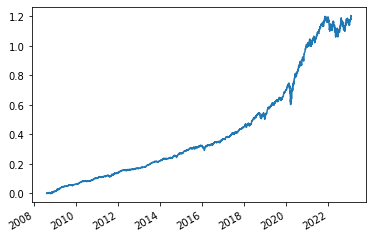

In [134]:
# Plot best 20 SR stocks
print(drift_adjusted_sharpe_ratios_std.loc['SR'].nlargest(20).index.intersection(drift_adjusted_sharpe_ratios_std.loc['DASR'].nlargest(20).index))

n_largest_sr = drift_adjusted_sharpe_ratios_normalized.loc['SR'].nlargest(20).index

agg_n_largest_sr_rets = {}

for ticker in n_largest_sr:
    agg_n_largest_sr_rets[ticker] = backtest.scale_vol(new_returns[ticker]) 
    backtest.cumulative_returns(agg_n_largest_sr_rets[ticker]).plot(title=ticker)
    agg_n_largest_sr_rets[ticker] *=1/len(n_largest_sr)
    plt.show()
    
agg_n_largest_sr_rets = pd.DataFrame(agg_n_largest_sr_rets).sum(1)
backtest.cumulative_returns(agg_n_largest_sr_rets).plot()
print(backtest.sharpe_ratio(agg_n_largest_sr_rets))

drift_adjusted_sharpe_ratios_normalized[drift_adjusted_sharpe_ratios_normalized.loc['SR'].nlargest(20).index]

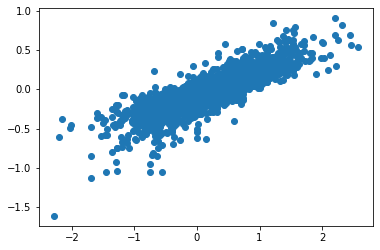

In [84]:
plt.scatter(drift_adjusted_sharpe_ratios.loc['SR'], drift_adjusted_sharpe_ratios.loc['DASR'])

In [ ]:
random_returns = pd.DataFrame()
for i in np.arange(10):
    tmp_random_returns = returns.iloc[:, np.random.random()*l]
    random_returns[tmp_random_returns.name] = tmp_random_returns

random_returns

In [ ]:
drift_adjusted_sharpe_ratios_random = {}

for ticker in random_returns.columns:
    drift_adjusted_sharpe_ratios_random[ticker] = drift_adjusted_sharpe_ratio(returns = random_returns[ticker], plot=True)

drift_adjusted_sharpe_ratios_random = pd.DataFrame(drift_adjusted_sharpe_ratios_random)
drift_adjusted_sharpe_ratios_random

Here... we can test for the validity of the concept of penalizing large jumps. In fact, we could make the MSE --> MSSE to even further penalize deviations from the expected value.

In [ ]:
# Construct OLS regression of portfolio returns over time
fake_rets = raw_returns['NEE'].dropna()
fake_rets.iloc[95] *= -15
fake_rets.iloc[390] *= 15

drift_adjusted_sharpe_ratio(returns = fake_rets) 